In [1]:
! python -m spacy download en
! pip install wordcloud
! wget https://gitlab.com/andras.simonyi/10_days_AI_training_data/raw/master/sentiment.tsv?inline=false -O sentiment.tsv

     |████████████████████████████████| 12.0 MB 30.1 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')
--2022-05-08 18:35:32--  https://gitlab.com/andras.simonyi/10_days_AI_training_data/raw/master/sentiment.tsv?inline=false
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447540 (437K) [text/plain]
Saving to: ‘sentiment.tsv’

sentiment.tsv       100%[===================>] 437.05K  1.69MB/s    in 0.3s    

2022-05-08 18:35:33 (1.69 MB/s) - ‘sentiment.tsv’ saved [447540/447540]



# Task: sentiment classification

The task is to classify one-sentence long movie reviews/opinions according to the sentiment they express. There are only two categories: positive and negative sentiment.


> "Data source: [UMICH SI650 - Sentiment Classification](https://www.kaggle.com/c/si650winter11/data)

> Training data: 7086 lines. 
  
> Format: 1|0 (tab) sentence

> Test data: 33052 lines, each contains one sentence. 

> The data was originally collected from opinmind.com (which is no longer active)."

The data is in the file "sentiment.tsv".

# Loading the data

In [2]:
import pandas as pd

df = pd.read_csv('sentiment.tsv', sep='\t', 
                 quoting=3, # Quotes are _never_ field separators
                 header=None)

df.head()

,0,1
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [3]:
df = df[[1,0]] # rearrange columns

df.rename(columns={1:"text", 0:"sentiment"}, inplace=True) # rename columns

df.head()

,text,sentiment
0,The Da Vinci Code book is just awesome.,1
1,this was the first clive cussler i've ever rea...,1
2,i liked the Da Vinci Code a lot.,1
3,i liked the Da Vinci Code a lot.,1
4,I liked the Da Vinci Code but it ultimatly did...,1


# Splitting into train, validation and test

Before doing anything else (!) we divide our data into train, validation and test parts,

In [4]:
df.columns[:-1]

Index(['text'], dtype='object')

In [5]:
df.columns[-1]

'sentiment'

In [6]:
X = df[df.columns[:-1]] # df[["text"]]
y = df[df.columns[-1]] #df["sentiment"]

In [7]:
X.shape

(7086, 1)

In [ ]:
"""
train 60    

train = %60
test = %20
validation = %20
"""

In [8]:
# Import the necessary function from Scikit
from sklearn.model_selection import train_test_split

# Please observe, that we can only do a split into two
# hence our best option is to call the function twice in a chain
# Don't forget to fix the random seed also, eg to 13, since that is a lucky number! :-)

# X_df_train, X_df_test_valid, y_df_train, y_df_test_valid = train_test_split(X, y, random_state = 13, shuffle=True, test_size = 0.2)
X_df_train, X_df_test_valid, y_df_train, y_df_test_valid = train_test_split(X, y, random_state = 13, shuffle=True, test_size = 0.4)

X_df_test, X_df_valid, y_df_test, y_df_valid = train_test_split(X, y, random_state = 13, shuffle=True, test_size = 0.5)


In [ ]:
print(len(X_df_train), len(X_df_valid), len(X_df_test))
assert len(X_df_train)==5668 and len(X_df_valid)==709 and len(X_df_test)==709

In [ ]:
assert 2==2

# Inspecting the data

In [9]:
X_df_train.shape

(4251, 1)

In [10]:
df_train = pd.concat([X_df_train, y_df_train], axis = 1)

In [11]:
df_train

,text,sentiment
131,I loved the da Vinci Code-very interesting to ...,1
5030,Mission Impossible 3 sucked......,0
3215,I love Brokeback Mountain.,1
1899,i love being a sentry for mission impossible a...,1
273,da vinci code was an awesome movie...,1
...,...,...
866,The Da Vinci Code is awesome..,1
2790,I love Harry Potter.,1
74,I LOVE THE DA VINCI CODE!!..,1
6320,"Oh, and Brokeback Mountain is a TERRIBLE movie...",0


In [12]:
df_train.describe()

,sentiment
count,4251.000000
mean,0.556575
std,0.496847
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


We can examine the lengths of sentences as well.

In [13]:
n_chars = df_train.text.apply(lambda x: len(x))

n_chars.describe()

count    4251.000000
mean       60.363914
std        37.827441
min        18.000000
25%        32.000000
50%        48.000000
75%        77.000000
max       203.000000
Name: text, dtype: float64

The first sentence with the maximal length:

In [14]:
n_chars.idxmax()

5109

In [15]:
long_sentence = df_train.loc[n_chars.idxmax(), "text"]
long_sentence

'A mother in Georgia wants her local school board to take Harry Potter out of the schools and libraries because, in her opinion, reading Harry Potter leads to witchcraft, which according to her is evil...'

# Extra task: Let's do a word cloud!

Let us visualize together and separately (by category) the sentences!

Tool: https://github.com/amueller/word_cloud


Good example: https://github.com/amueller/word_cloud/blob/master/examples/simple.py



In [16]:
# Helper function for displaying a word cloud
# Input: one _UNIFIED_, space separated string!
# Protip: https://www.tutorialspoint.com/python/string_join.htm
def do_wordcloud(text):
    from wordcloud import WordCloud
    
    # Generate a word cloud image
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    # the matplotlib way:
    import matplotlib.pyplot as plt

    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


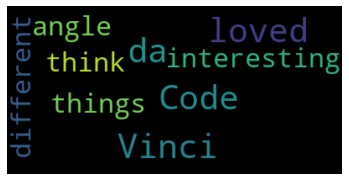

In [17]:
### TASK !!! ####
#Put here the world cloud!
for row in df_train.iterrows():
  text = row[1]["text"] # row = row[1]; text = row["text"]
  do_wordcloud(text)
  break

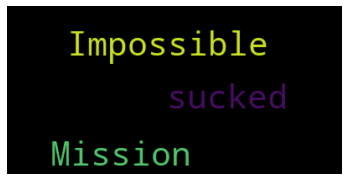

In [18]:
### TASK !!! ####
# Here only the cloud for sentences with negative sentiment!
# Help: the shape of the DataFrame with only the negative sentences is: (2975, 2)
# Source: https://pandas.pydata.org/pandas-docs/stable/indexing.html

for row in df_train[df_train.sentiment == 0].iterrows():
  text = row[1]["text"] # row = row[1]; text = row["text"]
  do_wordcloud(text)
  break


# Bag of words (BoW) representation of the texts

We will represent each text as a (sparse) vector of lemma (word root) counts for frequent lemmas in the training data. 

For tokenization and lemmatization we use [spaCy](https://spacy.io/), an open source Python NLP library, which can produce a list of unique lemma ids from the text.

In [19]:
import spacy

nlp = spacy.load("en", disable=["parser", "ner"]) 
# We only need the tokenizer, all higher functions are now unnecessary. TOKENİZER A BAK

spaCy can produce spaCy Doc objects from texts that contain their linguistic analysis, among others lemmas and their unique spaCy string ids.

In [20]:
doc = nlp(long_sentence)
type(doc)

spacy.tokens.doc.Doc

In [21]:
print([token.lemma_ for token in doc ]) # Lemmas

['a', 'mother', 'in', 'Georgia', 'want', '-PRON-', 'local', 'school', 'board', 'to', 'take', 'Harry', 'Potter', 'out', 'of', 'the', 'school', 'and', 'library', 'because', ',', 'in', '-PRON-', 'opinion', ',', 'read', 'Harry', 'Potter', 'lead', 'to', 'witchcraft', ',', 'which', 'accord', 'to', '-PRON-', 'be', 'evil', '...']


In [22]:
print([token.lemma for token in doc]) # Connected unique ID-s

[11901859001352538922, 7963322251145911254, 3002984154512732771, 309210702643012516, 7597692042947428029, 561228191312463089, 16319852998319793599, 13293160603192985325, 14899812206273857344, 3791531372978436496, 6789454535283781228, 5164779919001708464, 2416965663249996073, 1696981056005371314, 886050111519832510, 7425985699627899538, 13293160603192985325, 2283656566040971221, 1785747669126016609, 16950148841647037698, 2593208677638477497, 3002984154512732771, 561228191312463089, 14536103007527724270, 2593208677638477497, 11792590063656742891, 5164779919001708464, 2416965663249996073, 82546335403996757, 3791531372978436496, 17905374590688478165, 2593208677638477497, 7063653163634019529, 701735504652304602, 3791531372978436496, 561228191312463089, 10382539506755952630, 15036397985088571056, 10875615029400813363]


Now we have to convert these lists into BoW vectors. We could "roll our own", but, fortunately, scikit-learn has a feature extractor doing exactly that, the [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) so, for the sake of simplicity, we will use that along with spaCy.

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(analyzer=lambda s: [token.lemma for token in nlp(s)], #spaCy for analysis
                     min_df= 0.001) # We ignore the lemmas with low document frequency
cv

CountVectorizer(analyzer=<function <lambda> at 0x7f473cb9c9e0>, min_df=0.001)

In [24]:
sents = ["I hate this movie.", "The movie is the worst I've seen.", "I love in it"]
bows = cv.fit_transform(sents).toarray() 
# A CountVectorizer produces a sparse matrix, we convert to ndarray
bows

array([[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1],
       [2, 0, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0]])

In [25]:
cv.get_feature_names_out()

array([561228191312463089, 1995909169258310477, 2593208677638477497,
       3791531372978436496, 4755472761935940348, 6992604926141104606,
       7425985699627899538, 8706232279129489120, 10382539506755952630,
       11925638236994514241, 12342627399458421040, 12446819118446800910,
       12646065887601541794, 13468287115010965206, 13487348978371443426,
       14692702688101715474, 15597474948775060119, 17494803046312582752,
       18213940162184454424], dtype=object)

Using the CountVectorizer we convert the text columns of our train, validation and  test data into three sparse matrices.

In [26]:
from scipy.sparse import csr_matrix

A = csr_matrix([[1, 0, 2], [0, 3, 0]])
B = csr_matrix([[1, 0, 2], [0, 3, 0]])

In [27]:
from scipy.sparse import csr_matrix

A = csr_matrix([[1, 0, 2], [0, 4, 0]])
B = csr_matrix([[1, 0, 2], [0, 3, 0]])

In [28]:
bows_train = cv.fit_transform(df_train.text)

In [29]:
bows_train.sort_indices()

In [30]:
bows_train = cv.fit_transform(df_train.text)
bows_train.sort_indices() # comes from TF2.0 sparse implementation, obscure requirement
bow_length = bows_train.shape[1]
print("BoW length:", bow_length)
bows_train

BoW length: 366


<4251x366 sparse matrix of type '<class 'numpy.int64'>'
	with 47589 stored elements in Compressed Sparse Row format>

In [31]:
bows_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [32]:
df_valid = pd.concat([X_df_valid, y_df_valid], axis = 1)
df_test = pd.concat([X_df_test, y_df_test], axis = 1)

In [33]:
bows_valid = cv.transform(df_valid.text)
bows_valid.sort_indices() # comes from TF2.0 sparse implementation, obscure requirement
bows_test = cv.transform(df_test.text)
bows_test.sort_indices() # comes from TF2.0 sparse implementation, obscure requirement

# Task: The model

We build a feed-forward neural network in Keras for our binary classification task, which will be trained with cross-entropy loss and minibatch SGD.

In [34]:
bows_train.shape

(4251, 366)

In [35]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD


# USE KERAS FUNCTIONAl API!


# Parameters
############

hidden_size = 100

# Model
#######
# Define (instantiate) the input layer!
# Give the shape parameter the length of a BoW vector as length
# WARNING: shape only accepts a tuple, even is one dimensional!
inputs = Input(shape = (bows_train.shape[1],)) # feature sayısı kadar nöron oluşturulacağı için bizden bunu istiyor!

# Hidden layer
##############
# Define a fully connected hidden layer that can be modified by the parameters above!
# Use the ReLU activation function
# Give the inputs to the hidden layer
# Please be aware, that in Keras Functional, the parameters defining the layer are 
# "instantiation" parameters, but the input of the layer is already a "call" parameter!
# (The magic lies in the brackets... ;-)

hidden_output = Dense(hidden_size, activation = "relu")(inputs)

# Softmax 
#########
# Define the output softmax
# (Which is a fully connected layer with activation accordingly...)
# Please remember, we have exactly two classes! 
# (We choose to use this generalized, Softmax approach...)
# We feed the layer with the output of the hidden one.

predictions = Dense(2, activation="softmax")(hidden_output)

# Whole model
##############
# Nothing more is left, than to instantiate the model
# Please ensure input and output is right!

model = Model(inputs=inputs, outputs=predictions)

# Optimization
##############
# For now, we stick to this.
optimizer = SGD(lr=0.1)
 

# Compilation and teaching
##########################

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy', # use this cross entropy variant
                                                      # since the input is not one-hot encoded
              metrics=['accuracy']) #We measure and print accuracy during training

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


# Training

In [36]:
bows_train.shape

(4251, 366)

In [37]:
bows_train

<4251x366 sparse matrix of type '<class 'numpy.int64'>'
	with 47589 stored elements in Compressed Sparse Row format>

In [38]:
bows_valid.shape

(3543, 366)

In [39]:
model.fit(x=bows_train, 
          y=df_train.sentiment.values,
          validation_data=(bows_valid, df_valid.sentiment.values),
          epochs=10,
          batch_size=200)

# Please don't just run, understand!

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 100), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


22/22 [==============================] - 3s 13ms/step - loss: 0.5950 - accuracy: 0.7492 - val_loss: 0.4953 - val_accuracy: 0.8704
Epoch 2/10
22/22 [==============================] - 0s 6ms/step - loss: 0.4232 - accuracy: 0.8974 - val_loss: 0.3522 - val_accuracy: 0.9148
Epoch 3/10
22/22 [==============================] - 0s 6ms/step - loss: 0.2969 - accuracy: 0.9468 - val_loss: 0.2486 - val_accuracy: 0.9560
Epoch 4/10
22/22 [==============================] - 0s 6ms/step - loss: 0.2135 - accuracy: 0.9659 - val_loss: 0.1861 - val_accuracy: 0.9718
Epoch 5/10
22/22 [==============================] - 0s 6ms/step - loss: 0.1638 - accuracy: 0.9687 - val_loss: 0.1499 - val_accuracy: 0.9715
Epoch 6/10
22/22 [==============================] - 0s 6ms/step - loss: 0.1329 - accuracy: 0.9694 - val_loss: 0.1235 - val_accuracy: 0.9743
Epoch 7/10
22/22 [==============================] - 0s 6ms/step - loss: 0.1117 - accuracy: 0.9732 - val_loss: 0.1057 - val_accuracy: 0.9740
Epoch 8/10
22/22 [============

# Prediction

In [ ]:
print("=== INTERACTIVE DEMO ===")
while True:
    s = input("Enter a short text to evaluate or press return to quit: ")
    if s == "":
        break
    else:
        bow = cv.transform([s])
        prob_pred = model.predict(bow[0])
        print(f"Positive vs negative sentiment probability: {prob_pred[0,1]} vs {prob_pred[0,0]}")

=== INTERACTIVE DEMO ===
Enter a short text to evaluate or press return to quit: I love this movie
Positive vs negative sentiment probability: 0.9789135456085205 vs 0.021086467429995537
Enter a short text to evaluate or press return to quit: I have the movie
Positive vs negative sentiment probability: 0.5089259147644043 vs 0.4910740852355957
Enter a short text to evaluate or press return to quit: I hate this movie
Positive vs negative sentiment probability: 0.07100459933280945 vs 0.9289953708648682
Enter a short text to evaluate or press return to quit: I very love this great movie
Positive vs negative sentiment probability: 0.9843401908874512 vs 0.015659773722290993
Enter a short text to evaluate or press return to quit: Horrible movie I'd never seen
Positive vs negative sentiment probability: 0.32438352704048157 vs 0.675616443157196
Enter a short text to evaluate or press return to quit: Awful movie
Positive vs negative sentiment probability: 0.5114949345588684 vs 0.488505095243454
E